In [2]:
using PyPlot,JLD2,Statistics
rc("font",family="sans-serif")

In [86]:
include("plot_likelihood.jl")

moon_yrs (generic function with 1 method)

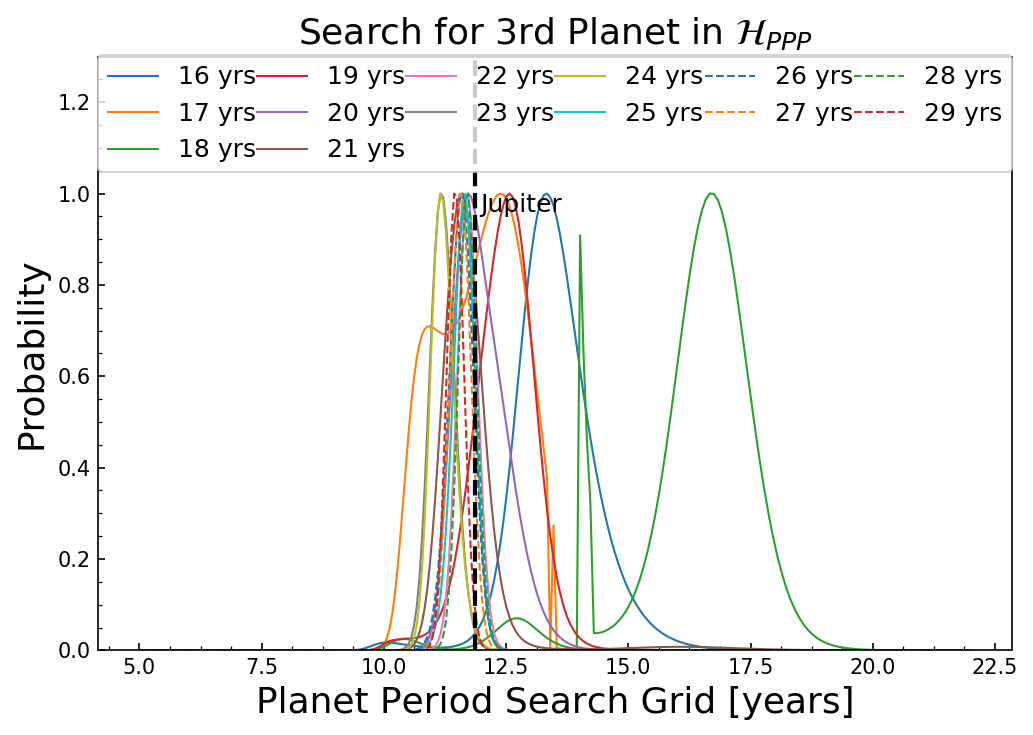

In [87]:
compare_yrs(30,"widep3",2)

In [3]:
include("CGS.jl")

Main.CGS

In [5]:
[4.15782e-6,2.81382e-6] .* CGS.MSUN/CGS.MEARTH

2-element Vector{Float64}:
 1.3842140126544138
 0.9367719317063373

In [79]:
include("plot_ttvs.jl")

plot_scatter (generic function with 2 methods)

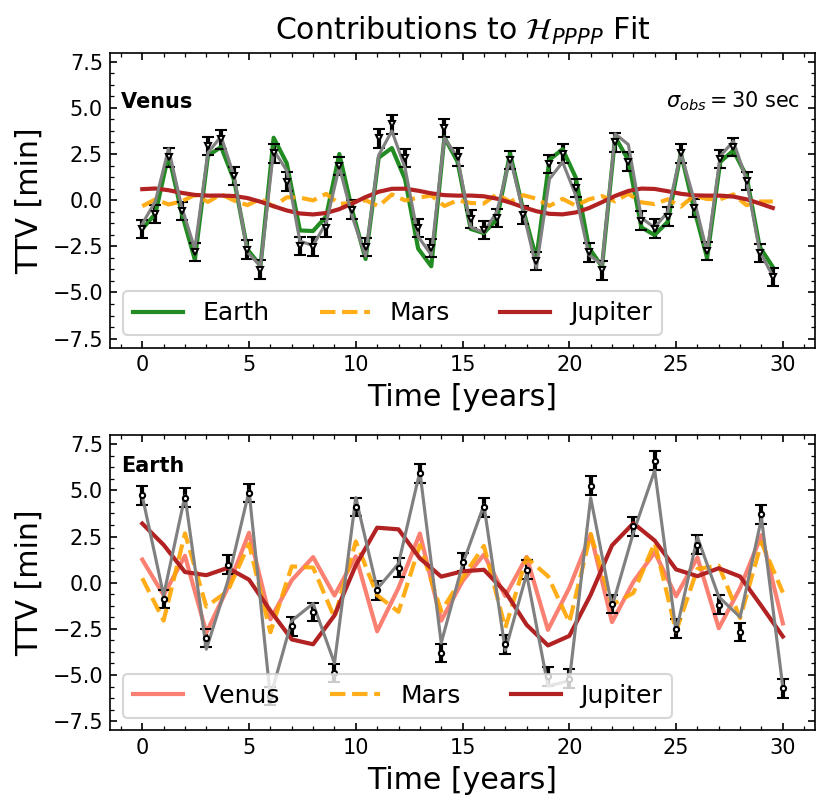

In [80]:
plot_contrib(30,30,["fromEV","widep4","best_p4"])

In [246]:
include("MCMC.jl")

mc_vals (generic function with 3 methods)

In [4]:
sigsys,sigtot,chi,BIC=mc_vals(30,30,"p4",2)

[N_obs]= 80 [no. of model params]= 21
 χ^2 from median: 62.93503946181404     reduced χ^2: 1.066695584098543
Retrieved values.
M_p[M⊕]=[0.9882162807725544, 0.9809049037196779, 0.4985703965558814, 106.15659699561212] +/- [0.10756512169697996, 0.051134347614518544, 0.09537947031988994, 44.43884966534506]
Per [d]=[224.70087426018134, 365.2564593406335, 672.0763063308683, 3976.2032564975525] +/- [1.9211620909900457e-5, 1.0820335962986189e-5, 0.561832743299187, 165.25445363595009]
eccen. =[0.020347476090152056, 0.008090112287747054, 0.16335541109274335, 0.17287055697545226] +/- [0.01270717953118973, 0.008659560768949423, 0.029532066282897992, 0.06815736140125923]
σsys[s]=31.5 +/- 5.905219393028407
σtot[s]=43.5


(31.5, 43.5, 62.94, -1081.0)

In [99]:
sigsys,sigtot,chi,BIC=mc_vals(30,30,"p3moonp4",2,true)

[N_obs]= 80 [no. of model params]= 24
 χ^2 from median: 61.29103677345401     reduced χ^2: 1.0944827995259645
Retrieved values.
M_p[M⊕]=[0.8635430894600241, 0.9967478904538218, 0.11218663179535836, 319.5170835927644] +/- [0.12224107311158189, 0.04424533279383659, 0.04856980164534849, 77.87475360448877]
Per [d]=[224.70077395317026, 365.2564463943351, 687.4129873909185, 4459.404522479553] +/- [5.570075545991594e-6, 1.899895630515269e-5, 4.0529896199174145, 39.182012817753446]
eccen. =[0.011141797308058752, 0.013886550277295536, 0.14557194287281966, 0.05963708505502505] +/- [0.008161256007961807, 0.006801220170843118, 0.08933974655516742, 0.02103537373523427]
σsys[s]=20.0 +/- 7.2483010237838235
σtot[s]=36.06


(20.0, 36.06, 61.29, -1101.0)

In [5]:
sigsys,sigtot,chi,BIC=mc_vals(10,30,"p4",2)

[N_obs]= 80 [no. of model params]= 21
 χ^2 from median: 63.26555620561182     reduced χ^2: 1.07229756280698
Retrieved values.
M_p[M⊕]=[0.9109778120835071, 0.9638524645983736, 0.43058979229593974, 118.33096270216005] +/- [0.10301304499800605, 0.046594384103062096, 0.09036249152816385, 50.20306596586903]
Per [d]=[224.7008737446903, 365.2564608010024, 672.4510380882573, 4181.885721853505] +/- [2.0512868372331313e-5, 9.749542484425612e-6, 0.4856385788666429, 767.8366597541685]
eccen. =[0.030146543073206158, 0.0131346072791872, 0.20211247629895016, 0.16440203140668272] +/- [0.013452005313876513, 0.010530721822277147, 0.032568421735222876, 0.07696687427577723]
σsys[s]=37.0 +/- 4.000807763837747
σtot[s]=38.33


(37.0, 38.33, 63.27, -548.3)

In [109]:
sigsys,sigtot,chi,BIC=mc_vals(10,30,"p3moonp4",2,true)

[N_obs]= 80 [no. of model params]= 24
 χ^2 from median: 58.622311480936794     reduced χ^2: 1.0468269907310142
Retrieved values.
M_p[M⊕]=[0.8668782748052972, 1.002545848218012, 0.09463367128490371, 375.97107428732755] +/- [0.08087133456403038, 0.02955861467424602, 0.033885593114500866, 60.83720197738476]
Per [d]=[224.7007709521066, 365.25645266414415, 687.418456603714, 4456.337635005184] +/- [3.996576576761432e-6, 6.897636261449325e-6, 2.496622954415985, 22.985838512948764]
eccen. =[0.009419126192450132, 0.01396093532187219, 0.14631592330382923, 0.05812441118393482] +/- [0.004868872332566752, 0.004315492804943076, 0.08941323706001049, 0.010682587224411599]
σsys[s]=21.8 +/- 2.6137712141245277
σtot[s]=23.98


(21.8, 23.98, 58.62, -876.5)

In [161]:
planets=["Venus", "Earth", "Mars","Jupiter" ]
true_Mp=[0.815, 1, 0.1074, 317.8]
true_per=[]
colors=["salmon","darkgreen","orange","firebrick"]


function plot_noise(true_val,med,lower,upper)
    noise=[10,30,60]
    nplanet=3
    for j=1:length(noise)
        for iplanet=1:nplanet
            scatter(noise[j],med[iplanet],color=colors[iplanet])
            
        end
    end
end
noise=[10,30]
function plot_noise(true_val,med,error)
    nplanet=3
    for iplanet=1:nplanet
        text(15,true_val[iplanet]+0.01,string(planets[iplanet]),fontsize="medium")
        axhline(true_val[iplanet],linestyle="--",color=colors[iplanet])
        for j=1:length(noise)
#             println(j, " ",iplanet)
        errorbar(noise[j],med[iplanet,j],error[iplanet,j],color=colors[iplanet],fmt="o",capsize=4)
#         errorbar(30,med[iplanet,j],error[iplanet,j],color=colors[iplanet],fmt="o",capsize=4)
            
        end
    end
#     minorticks_on()
end

plot_noise (generic function with 2 methods)

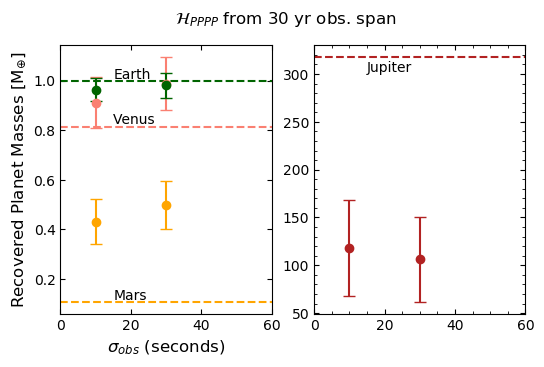

In [260]:
Mp10=[0.9109778120835071, 0.9638524645983736, 0.43058979229593974, 118.33096270216005]
Mp_err10=[0.10301304499800605, 0.046594384103062096, 0.09036249152816385, 50.20306596586903]
Mp30=[0.9882162807725544, 0.9809049037196779, 0.4985703965558814, 106.15659699561212]
Mp_err30=[0.10756512169697996, 0.051134347614518544, 0.09537947031988994, 44.43884966534506]

Mp=[Mp10 Mp30]
Mp_err=[Mp_err10 Mp_err30]

fig=plt.figure(figsize=(6,3.5))
# fig.suptitle(string(model," Posteriors for Planet 1"))
model=L"$\mathcal{H}_{PPPP}$"
suptitle(string(model," from 30 yr obs. span"))
ax1=subplot(121)
plot_noise(true_Mp,Mp,Mp_err)

tick_params(which="both",direction="in",right=true,top=true)
ylabel(L"Recovered Planet Masses [M$_{\oplus}$]",fontsize="large")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="large")
ax2=subplot(122)
errorbar(noise[1],Mp[4,1],Mp_err[4,1],fmt="o",capsize=4,color=colors[4])
errorbar(noise[2],Mp[4,2],Mp_err[4,2],fmt="o",capsize=4,color=colors[4])
axhline(true_Mp[4],linestyle="--",color=colors[4])
text(15,true_Mp[4]-15,string(planets[4]),fontsize="medium")
minorticks_on()
ax1.set_xlim(0,60)
ax2.set_xlim(0,60)
tick_params(which="both",direction="in",right=true,top=true)
# tight_layout()

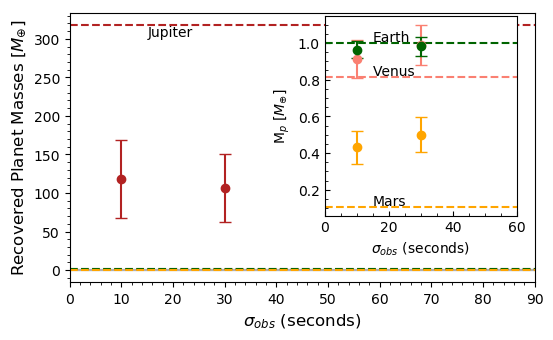

PyObject Text(0.5, 99.7611111111111, '$\\sigma_{obs}$ (seconds)')

In [259]:
fig=plt.figure(figsize=(6,3.5))
# plot_noise(true_Mp,Mp,Mp_err)
errorbar(noise[1],Mp[4,1],Mp_err[4,1],fmt="o",capsize=4,color=colors[4])
errorbar(noise[2],Mp[4,2],Mp_err[4,2],fmt="o",capsize=4,color=colors[4])
text(15,true_Mp[4]-15,string(planets[4]),fontsize="medium")
# axhline(true_Mp[4],linestyle="--",color=colors[4])
for iplanet=1:4
        axhline(true_Mp[iplanet],linestyle="--",color=colors[iplanet])
end
axhspan(0,1.2,color="grey",alpha=0.5)
xlim(0,90)
minorticks_on()
ylabel(L"Recovered Planet Masses [$M_{\oplus}$]",fontsize="large")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="large")
ax2=fig.add_axes([0.55,0.3,0.32,0.57])
plot_noise(true_Mp,Mp,Mp_err)
ax2.set_xlim(0,60)
# ax2.set_ylim()
ax2.tick_params(which="both",direction="in",right=false,top=false)
minorticks_on()
ylabel(L"M$_p$ [$M_{\oplus}$]",fontsize="medium")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="medium")

In [251]:

x=range(0,stop=2pi,length=20);dx=0.5
fx(x)=sin.(x) + cos.(x);dy=0.5
y=fx(x)
plot(x,y)
# annotate("Look, data!",
# 	xy=[3;0],# Arrow tip
# 	xytext=[3+dx;0+dy], # Text offset from tip
# 	xycoords="data", # Coordinates in in "data" units
# 	color="red") # Julia
arrow(3,0,dx,dy,facecolor="black",width=0.05)
text(3-0.5,0-0.15,"look at me",)

LoadError: UndefVarError: family not defined

### Results

In [5]:

function span_vs_mass(fmt,less20::Bool=false)
    function plot_span(iplanet,color,fmt::String,less20::Bool)
        errorbar(30,M30yr[iplanet],M30yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(25,M25yr[iplanet],M25yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(20,M20yr[iplanet],M20yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        if less20
            errorbar(15,M15yr[iplanet],M15yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        end
        xlim(0,40)
        xlabel("Observation Time Span (yrs)")
        minorticks_on()
        
    end
end
function noise_vs_mass(fmt,g90::Bool=false)
    function plot_noise(iplanet,color,fmt::String,g90::Bool)
        axhline(vals[iplanet],linestyle="--",color="black")
        errorbar(10,M10sec[iplanet],M10sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(30,M30sec[iplanet],M30sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(60,M60sec[iplanet],M60sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        if g90
            errorbar(90,M90sec[iplanet],M90sec_er[iplanet],fmt=fmt,color=color,capsize=4)
            errorbar(120,M120sec[iplanet],M120sec_er[iplanet],fmt=fmt,color=color,capsize=4)
            ylim(0,M120sec[iplanet]*2)
        end
        xlim(0,180)
        xlabel(L"$\sigma_{ij}$ (seconds)")
        minorticks_on()
        tick_params(which="both",direction="in",right="true",top="true")
    end
    fig=figure(figsize=(8,6))
    if length(M10sec) > 3
        ax1=subplot(141)
    else
        ax1=subplot(131)
    end
    axhline(vals[1],linestyle="--",color="black")
    plot_noise(1,"orange",fmt,g90)
    ax1.set_ylabel(L"Recovered Planet 1 Mass [$M_{Earth}$]")
    ax1.text(120,0.84,"Venus")
    ax1.set_ylim(0,1.8)
    if length(M10sec) > 3
        ax2=subplot(142)
    else
        ax2=subplot(132)
    end
    axhline(vals[2],linestyle="--",color="black")
    plot_noise(2,"green",fmt,g90)
    ax2.set_ylabel(L"Recovered Planet 2 Mass [$M_{Earth}$]")
    ax2.text(120,1.02,"Earth")
    ax2.set_ylim(0,1.2)
    if length(M10sec) > 3
        ax3=subplot(143)
        axhline(vals[4],linestyle="--",color="black")
        plot_noise(4,"firebrick",fmt,g90)
        ax3.set_ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
        ax3.text(120,300,"Jupiter")
        ax3.set_ylim(0,350)
        ax4=subplot(144)
        axhline(vals[3],linestyle="--",color="black")
        plot_noise(3,"darkcyan",fmt,g90)
        ax4.set_ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
        ax4.text(120,2,"Mars")
        ax4.set_ylim(0,50)
    else
        ax3=subplot(133)
        axhline(vals[4],linestyle="--",color="black")
        plot_noise(3,"firebrick",fmt,g90)
        ax3.set_ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
        ax3.text(120,300,"Jupiter")
        ax3.set_ylim(0,350)
    end
    tight_layout()
end

noise_vs_mass (generic function with 2 methods)

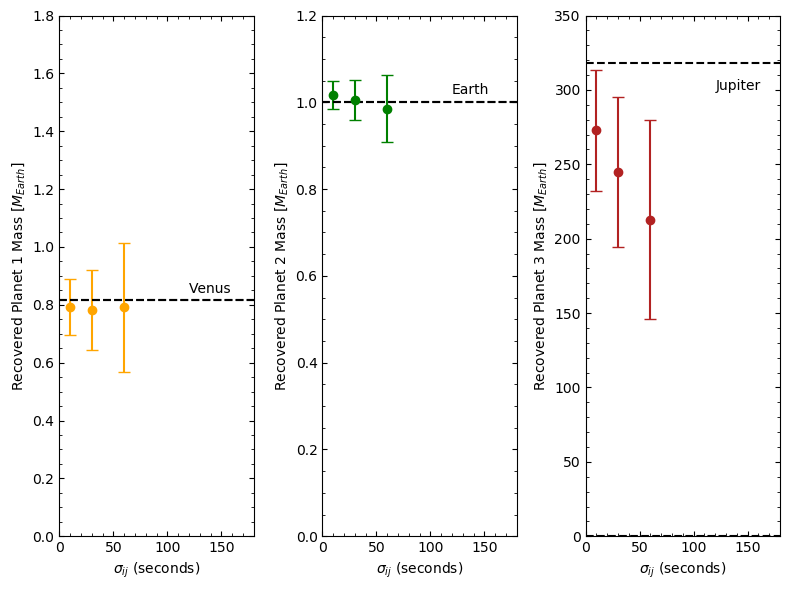

In [12]:
M10sec, M10sec_er = get_vals(10.0,30.0,"noEMB","moon")
M30sec, M30sec_er = get_vals(30.0,30.0,"noEMB","moon")
M60sec, M60sec_er = get_vals(60.0,30.0,"noEMB","moon")
# M90, M90_er = get_vals(90.0,30.0,"noEMB","p3")
# M120, M120_er = get_vals(120.0,30.0,"noEMB","p3")
noise_vs_mass("o",false)

In [15]:
M15, M15_er = get_vals(10.0,15.0,"EMB","p3")
M20, M20_er = get_vals(10.0,20.0,"EMB","p3")
M25, M25_er = get_vals(10.0,25.0,"EMB","p3")
M30, M30_er = get_vals(10.0,30.0,"EMB","p3")

([0.8177849465834524, 1.017866757652709, 269.8687043482864], [0.045294677570712163, 0.031350434438001784, 38.78034735184125])

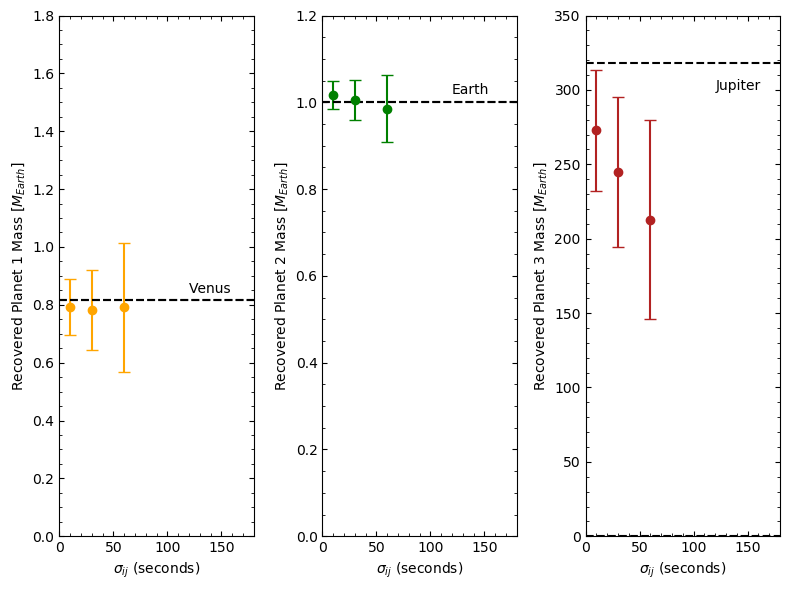

In [29]:
M10, M10_er = get_vals(10.0,30.0,"noEMB","p4")
M30, M30_er = get_vals(30.0,30.0,"noEMB","p4")
M60, M60_er = get_vals(60.0,30.0,"noEMB","p4")
noise_vs_mass("o")

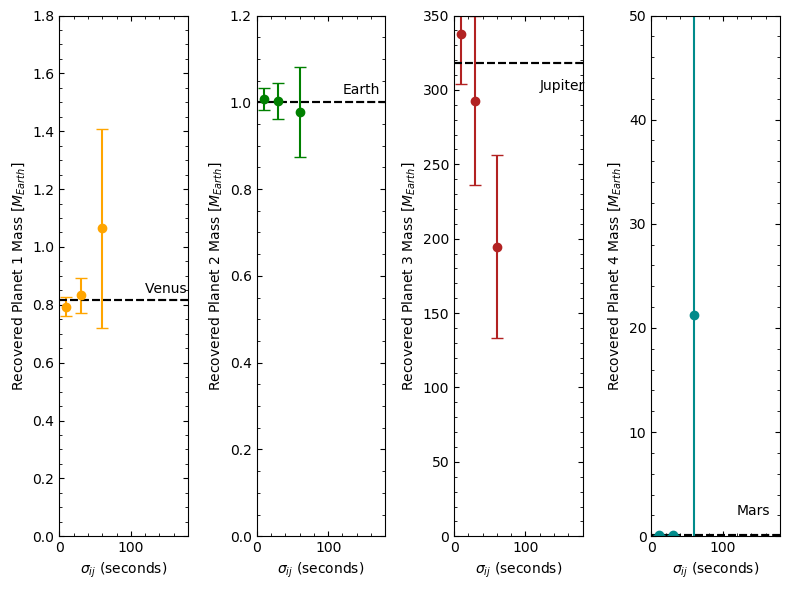

In [42]:
M10, M10_er = get_vals(10.0,30.0,"EMB","p4")
M30, M30_er = get_vals(30.0,30.0,"EMB","p4")
M60, M60_er = get_vals(60.0,30.0,"EMB","p4")
noise_vs_mass("o")

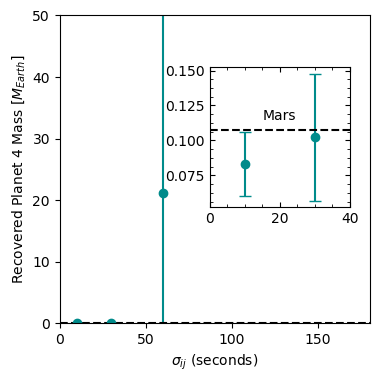

In [50]:
fig=figure(figsize=(4,4))
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(60,M60[3],M60_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
xlabel(L"$\sigma_{ij}$ (seconds)")
xlim(0,180)
ylim(0,50)
ax2 = fig.add_axes([0.5,0.4,0.35,0.35])
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
ax2.text(15,0.115,"Mars")
minorticks_on()
xlim(0,40)
tick_params(which="both",direction="in",right="true",top="true")

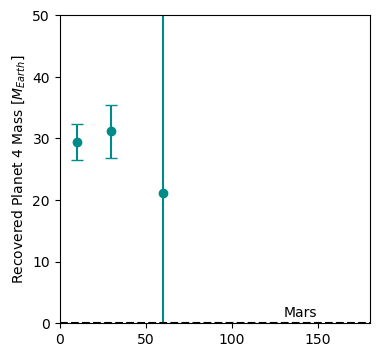

(0, 50)

In [129]:
M10, M10_er = get_vals(10.0,30.0,"noEMB","p4")
M30, M30_er = get_vals(30.0,30.0,"noEMB","p4")
M60, M60_er = get_vals(60.0,30.0,"noEMB","p4")
fig=figure(figsize=(4,4))
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(60,M60[3],M60_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
text(130,1,"Mars")
ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
xlim(0,180)
ylim(0,50)

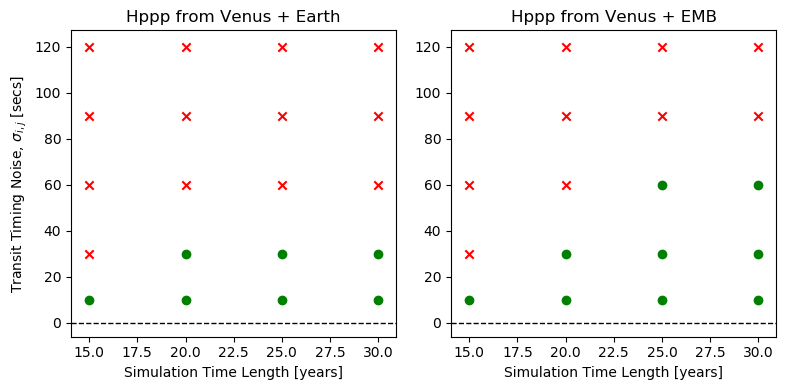

In [20]:
figure(figsize=(8,4)) 
# suptitle("Giant Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(20,10,marker="o",color="green")
ax1.scatter(25,10,marker="o",color="green")
ax1.scatter(30,10,marker="o",color="green")
ax1.scatter(15,30,marker="x",color="red")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(20,30,marker="o",color="green")
ax1.scatter(25,30,marker="o",color="green")
ax1.scatter(30,30,marker="o",color="green")
ax1.scatter(15,60,marker="x",color="red")
ax1.scatter(20,60,marker="x",color="red")
ax1.scatter(25,60,marker="x",color="red")
ax1.scatter(30,60,marker="x",color="red")
ax1.scatter(15,90,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(20,90,marker="x",color="red")
ax1.scatter(25,90,marker="x",color="red")
ax1.scatter(30,90,marker="x",color="red")
ax1.scatter(15,120,marker="x",color="red")
ax1.scatter(20,120,marker="x",color="red")
ax1.scatter(25,120,marker="x",color="red")
ax1.scatter(30,120,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_xlabel("Simulation Time Length [years]")
# ax1.text(.5,5.5,"a)")
ax1.set_title("Hppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(20,10,marker="o",color="green")
ax2.scatter(25,10,marker="o",color="green")
ax2.scatter(30,10,marker="o",color="green")
ax2.scatter(15,30,marker="x",color="red")
ax2.scatter(20,30,marker="o",color="green")
ax2.scatter(25,30,marker="o",color="green")
ax2.scatter(30,30,marker="o",color="green")
ax2.scatter(15,60,marker="x",color="red")
ax2.scatter(20,60,marker="x",color="red")
ax2.scatter(25,60,marker="o",color="green")
ax2.scatter(30,60,marker="o",color="green")
ax2.scatter(15,90,marker="x",color="red")
ax2.scatter(20,90,marker="x",color="red")
ax2.scatter(25,90,marker="x",color="red")
ax2.scatter(30,90,marker="x",color="red")
ax2.scatter(15,120,marker="x",color="red")
ax2.scatter(20,120,marker="x",color="red")
ax2.scatter(25,120,marker="x",color="red")
ax2.scatter(30,120,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
# ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_title("Hppp from Venus + EMB")
tight_layout()
show()
# make yaxis evenly spaced... dashed line at 0

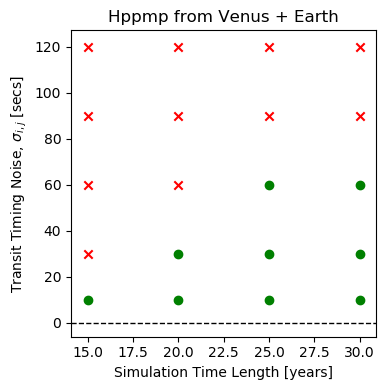

In [26]:
fig=figure(figsize=(4,4)) #Moon detections from EV times
ax3=gca()
ax3.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
# ax2.scatter(1+0.1,1,marker="o",color="green")
ax3.scatter(20,10,marker="o",color="green")
ax3.scatter(25,10,marker="o",color="green")
ax3.scatter(30,10,marker="o",color="green")
ax3.scatter(15,30,marker="x",color="red")
ax3.scatter(20,30,marker="o",color="green")
ax3.scatter(25,30,marker="o",color="green")
ax3.scatter(30,30,marker="o",color="green")
ax3.scatter(15,60,marker="x",color="red")
ax3.scatter(20,60,marker="x",color="red")
ax3.scatter(25,60,marker="o",color="green")
ax3.scatter(30,60,marker="o",color="green")
ax3.scatter(15,90,marker="x",color="red")
ax3.scatter(20,90,marker="x",color="red")
ax3.scatter(25,90,marker="x",color="red")
ax3.scatter(30,90,marker="x",color="red")
ax3.scatter(15,120,marker="x",color="red")
ax3.scatter(20,120,marker="x",color="red")
ax3.scatter(25,120,marker="x",color="red")
ax3.scatter(30,120,marker="x",color="red")
ax3.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
ax3.set_xlabel("Simulation Time Length [years]")
ax3.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
# ax2.text(.5,5.5,"b)")
ax3.set_title("Hppmp from Venus + Earth")
tight_layout()
show()

In [ ]:
figure(figsize=(8,4)) 
title("Terrestrial Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(2,1,marker="o",color="green")
ax1.scatter(3,1,marker="o",color="green")
ax1.scatter(4,1,marker="o",color="green")
ax1.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(2,2,marker="o",color="green")
ax1.scatter(3,2,marker="o",color="green")
ax1.scatter(4,2,marker="o",color="green")
ax1.scatter(1,3,marker="o",color="green")
ax1.scatter(2,3,marker="o",color="green")
ax1.scatter(3,3,marker="o",color="green")
ax1.scatter(4,3,marker="x",color="red")
ax1.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(2,4,marker="x",color="red")
ax1.scatter(3,4,marker="x",color="red")
ax1.scatter(4,4,marker="x",color="red")
ax1.scatter(1,5,marker="x",color="red")
ax1.scatter(2,5,marker="x",color="red")
ax1.scatter(3,5,marker="x",color="red")
ax1.scatter(4,5,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_xlabel("Simulation Time Length [years]")
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_title("Hpppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(2,1,marker="o",color="green")
ax2.scatter(3,1,marker="o",color="green")
ax2.scatter(4,1,marker="o",color="green")
ax2.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax2.scatter(2,2,marker="o",color="green")
ax2.scatter(3,2,marker="o",color="green")
ax2.scatter(4,2,marker="o",color="green")
ax2.scatter(1,3,marker="o",color="green")
ax2.scatter(2,3,marker="x",color="red")
ax2.scatter(3,3,marker="o",color="green")
ax2.scatter(4,3,marker="x",color="red")
ax2.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax2.scatter(2,4,marker="x",color="red")
ax2.scatter(3,4,marker="x",color="red")
ax2.scatter(4,4,marker="x",color="red")
ax2.scatter(1,5,marker="x",color="red")
ax2.scatter(2,5,marker="x",color="red")
ax2.scatter(3,5,marker="x",color="red")
ax2.scatter(4,5,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_title("Hppp from Venus + EMB")
# ax1.legend()
tight_layout()
show()

Loading...MCMC/p4_mcmc10.0s30.0yrs.jld2 and FITS/p4_fit10.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc10.0s25.0yrs.jld2 and FITS/p4_fit10.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 10.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc10.0s15.0yrs.jld2 and FITS/p4_fit10.0s15.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s30.0yrs.jld2 and FITS/p4_fit30.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s25.0yrs.jld2 and FITS/p4_fit30.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 15.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s30.0yrs.jld2 and FITS/p4_fit60.0s30.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s15.0yrs.jld2 and FITS/p4_fit60.0s15.0yrs.jld2
MCMC or FITS file for 

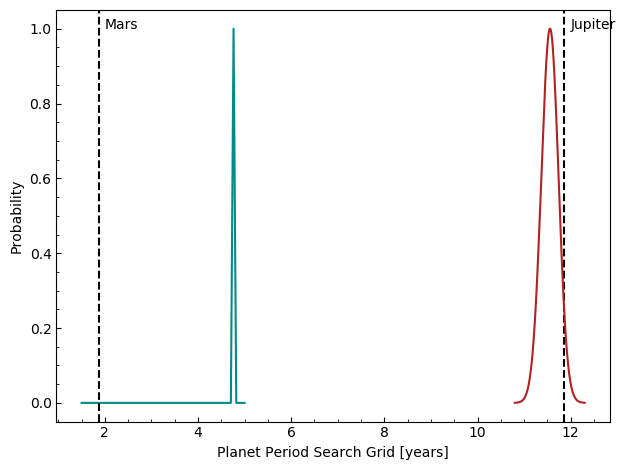

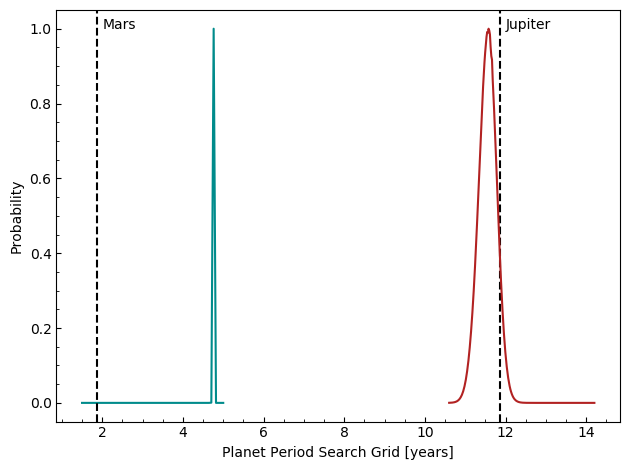

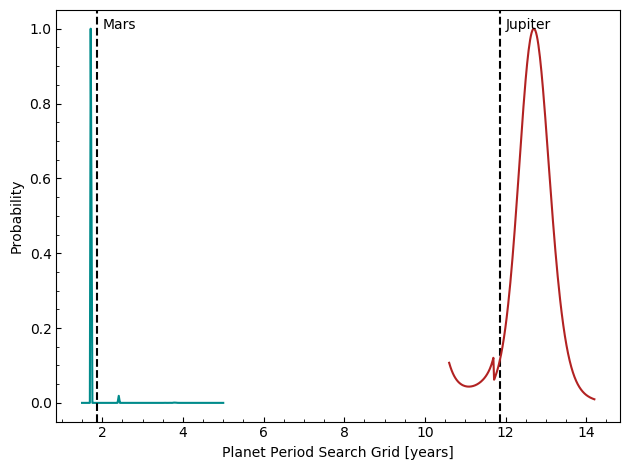

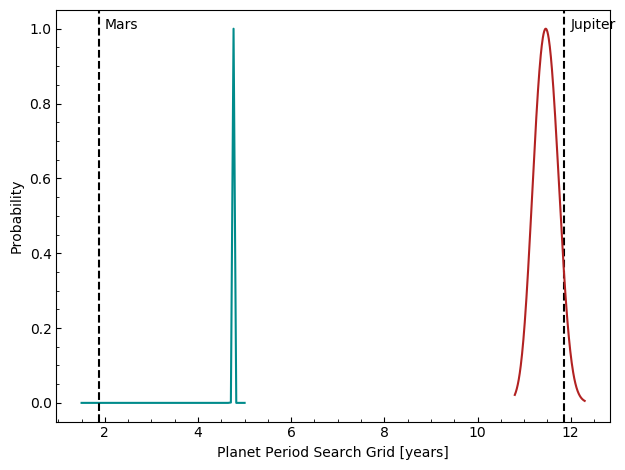

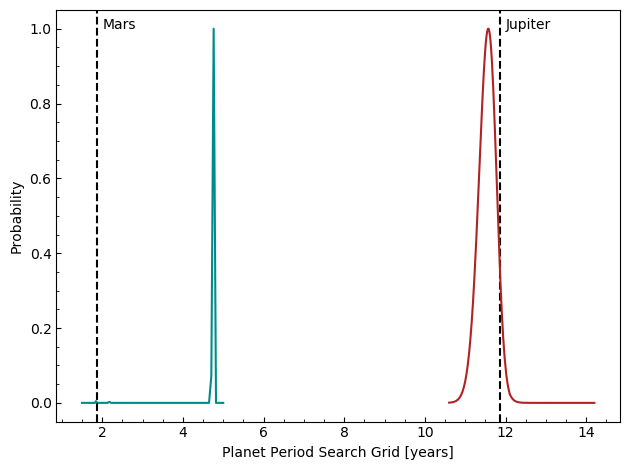

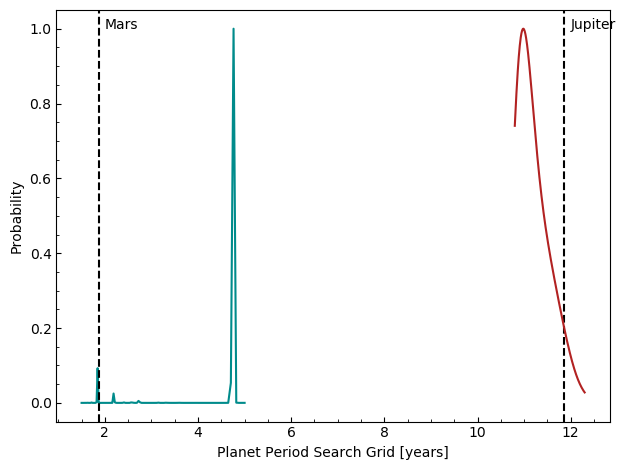

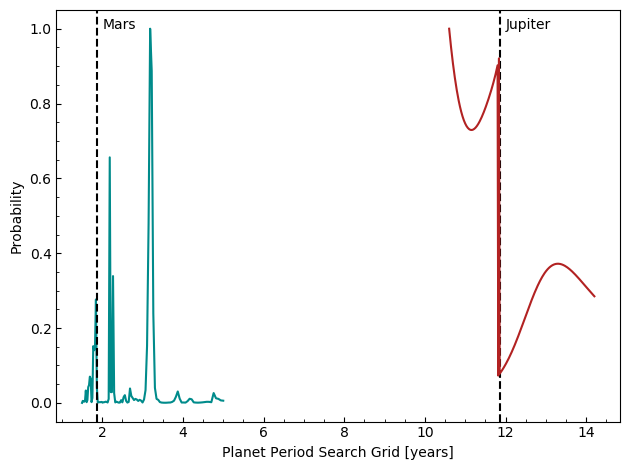

noEMB with p4 model at 90.0 secs and 30.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 15.0 yrs doesn't exist!!!!


In [199]:
# include("plot_emcee.jl")
# include("corner_plot.jl")
include("plot_likelihood.jl")
# include("plot_ttvs.jl")
sigs=[10.0,30.0,60.0,90.0]#,120.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
# plot_emcee(sigs[i],years[j],"noEMB","moon",true)
# corner_plot(sigs[i],years[j],"noEMB","moon",50,true) #still need to run moon true
plot_likelihood(sigs[i],years[j],"noEMB","p4","p4",50) 
# plot_ttvs(sigs[i],years[i],"EMB","p3",false) 
    end
end

### Linear Fit to Posterior mean and/or std

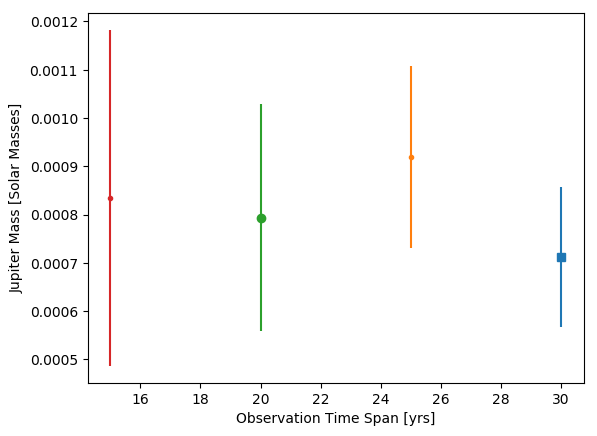

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

In [105]:
using Random
rng = MersenneTwister(1234)
x=range(0,8,length=16)
collect(x)

16-element Array{Float64,1}:
 0.0               
 0.5333333333333333
 1.0666666666666667
 1.6               
 2.1333333333333333
 2.6666666666666665
 3.2               
 3.7333333333333334
 4.266666666666667 
 4.8               
 5.333333333333333 
 5.866666666666666 
 6.4               
 6.933333333333334 
 7.466666666666667 
 8.0               

In [108]:
y1(x) = 3 .+ 4 .* x./8 .+ rand(rng,Float64, length(x))
y2(x) = 1 .+ 2 .* x./8 .+ rand(rng,Float64, length(x))

y2 (generic function with 1 method)

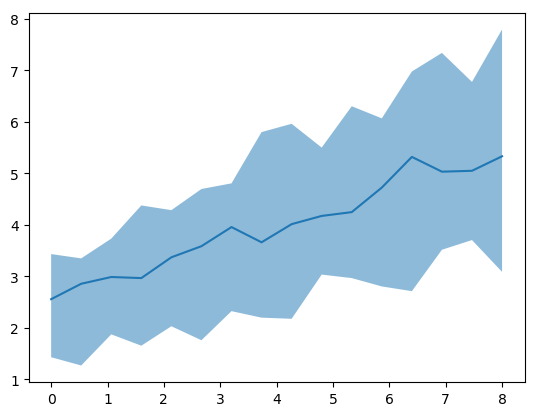

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x153fa7198>

In [109]:
fig,ax=subplots()
ax.fill_between(x, y1(x), y2(x), alpha=.5, linewidth=0)
plot(x,(y1(x) + y2(x))/2)